In [1]:
import os
import cv2
import numpy as np

In [2]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model

In [4]:
def preprocess_img(img):
    img=cv2.resize(img, (224, 224))
    img = img_to_array(img)
    img = preprocess_input(img)
    img = np.expand_dims(img, axis = 0)
    return img

In [5]:
def plot_img(img, title):
    imgplot = plt.imshow(img)
    plt.title(title)
    plt.show()

In [6]:
model=load_model("Mask_detector_1.h5")

In [7]:
# print(model.summary())

In [18]:
path= 'test8.jpeg'
img = cv2.imread(path)
# print(img)
    

In [19]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# print(gray)

In [20]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
  
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
print(faces)

[[ 424  278  199  199]
 [ 783  223  215  215]
 [1128  238  188  188]
 [ 762  735  145  145]]


In [21]:
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    face = img[y:y + h, x:x + w]
#     cv2.imshow("face",face)
    cv2.imwrite('face.jpg', face)
    k=preprocess_img(face)
    print(k.shape)
#     plot_img(k, "jhs")
    pred=model.predict(x=k)
    rounded_pred=np.round(pred)
    accuracy=pred[0][0]*100 if rounded_pred[0][0]==1 else pred[0][1]*100
    print(accuracy)
    cv2.putText(img, ("Unmasked " if rounded_pred[0][0]==1 else "Masked ")+ str(round(accuracy, 3))+"%", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
  

(1, 224, 224, 3)
52.26159691810608
(1, 224, 224, 3)
99.98517036437988
(1, 224, 224, 3)
64.96204733848572
(1, 224, 224, 3)
98.64107966423035


In [22]:
print(faces)

[[ 424  278  199  199]
 [ 783  223  215  215]
 [1128  238  188  188]
 [ 762  735  145  145]]


In [23]:
cv2.imwrite('detcted.jpg', img)
# cv2.imshow('img', img)
# cv2.waitKey()

True

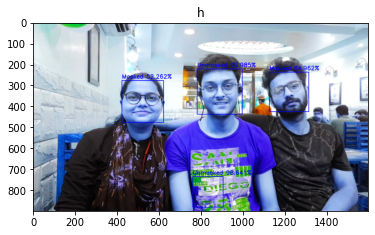

In [24]:
plot_img(img, "h")

In [16]:
import cv2

cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=1, fy=1, interpolation=cv2.INTER_AREA)
    img=frame
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_alt2.xml')
  
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
        face = img[y:y + h, x:x + w]
        k=preprocess_img(face)
        pred=model.predict(x=k)
        rounded_pred=np.round(pred)
        accuracy=pred[0][0]*100 if rounded_pred[0][0]==1 else pred[0][1]*100
        cv2.putText(img, ("Unmasked " if rounded_pred[0][0]==1 else "Masked ")+ str(round(accuracy, 3))+"%", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
  
    
    cv2.imshow('Input', img)

    c = cv2.waitKey(1)
    if c == 27:
        break

cap.release()
cv2.destroyAllWindows()